# MNIST Dataset Notebook
The MNIST dataset is a dataset that is built up of hand written digits derived from the NIST dataset. It is used for people to derive machine learning models for pattern recognition from a real world set of data. 

The MNIST data set is widely used for training image recognition classifiers. 

The dataset consists of:
- 60,000 training images
- 10,000 test images

The dataset can be found on this website [here](http://yann.lecun.com/exdb/mnist/).

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

## MNIST Dataset File format
> All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

The MNIST dataset is stored with the IDX file format extension. The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types. 

The MNIST dataset consists of four files outlined below:

| File          | Description       | 
| :------------ | ----------------- | 
| [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz) | training set images (9912422 bytes) | 
| [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz) | training set labels (28881 bytes) |
| [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz) | test set images (1648877 bytes) | 
| [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz) | test set labels (4542 bytes) | 

> The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.  

### Training set label file (train-labels-idx1-ubyte)
The labels values are 0 to 9.

| offset        | type           | value               | description              |
| :------------ | -------------- | ------------------- | ------------------------ |
| 0000          | 32 bit integer | 0x00000801(2049)    | magic number (MSB first) |
| 0004          | 32 bit integer | 60000               | number of items          |
| 0008          | unsigned byte  | ??                  | label                    |
| 0009          | unsigned byte  | ??                  | label                    |

### Training set image file (train-images-idx3-ubyte):
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

| offset        | type           | value               | description              |
| :------------ | -------------- | ------------------- | ------------------------ |
| 0000          | 32 bit integer | 0x00000803(2051)    | magic number             |
| 0004          | 32 bit integer | 60000               | number of images         |
| 0008          | 32 bit integer | 28                  | number of rows           |
| 0012          | 32 bit integer | 28                  | number of columns        |
| 0016          | unsigned byte  | ??                  | pixel                    |
| 0017          | unsigned byte  | ??                  | pixel                    |
| xxxx          | unsigned byte  | ??                  | pixel                    |


### Test set label file (t10k-labels-idx1-ubyte)
The labels values are 0 to 9.

| offset        | type           | value               | description              |
| :------------ | -------------- | ------------------- | ------------------------ |
| 0000          | 32 bit integer | 0x00000801(2049     | magic number (MSB first) |
| 0004          | 32 bit integer | 10000               | number of items          |
| 0008          | unsigned byte  | ??                  | label                    |
| 0009          | unsigned byte  | ??                  | label                    |

### Test set image file (t10k-images-idx3-ubyte):
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black). 

| offset        | type           | value               | description              |
| :------------ | -------------- | ------------------- | ------------------------ |
| 0000          | 32 bit integer | 0x00000803(2051)    | magic number             |
| 0004          | 32 bit integer | 10000               | number of images         |
| 0008          | 32 bit integer | 28                  | number of rows           |
| 0012          | 32 bit integer | 28                  | number of columns        |
| 0016          | unsigned byte  | ??                  | pixel                    |
| 0017          | unsigned byte  | ??                  | pixel                    |
| xxxx          | unsigned byte  | ??                  | pixel                    |

## IDX File Format
The dataset is stored with the IDX file format, the full specification of the IDX file format can be found [here](http://www.fon.hum.uva.nl/praat/manual/IDX_file_format.html). 

> The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.

### Example
The training and testing data of the MNIST database of handwritten digits at [mnist](http://yann.lecun.com/exdb/mnist/) is stored in compressed IDX formatted files.

Reading the uncompressed file train-images-idx3-ubyte available at [mnist](http://yann.lecun.com/exdb/mnist/) with 60000 images of 28×28 pixel data, will result in a new Matrix object with 60000 rows and 784 (=28×28) columns. 

Each cell will contain a number in the interval from 0 to 255.

Reading the uncompressed file train-labels-idx1-ubyte with 60000 labels will result in a new Matrix object with 1 row and 60000 columns. Each cell will contain a number in the interval from 0 to 9.


## Reading Dataset from file
To read the dataset into memory we will use a widely supported python package called gzip to convert the file into bytes. 

### Big Endian, Little Endian
In the MNIST dataset specifcation as seen above, it states that the vectors are stored in big endian format. I will briefly explain what big endian means and why it is relavant to understand how it works when working with this dataset.

#### Big Endian byte order
The most significant byte (the "big end") of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory.

#### Little Endian byte order
The least significant byte (the "little end") of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory.

For this dataset as we are using a machine with an Intel CPU we need to convert the dataset stored with big endian byter order to little endian. We need to do this otherwise we would not be able to manipulate the dataset.

In [2]:
import gzip 

# Open zip file with gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()
    
# Read in first 4 bytes which we know is the magic number
# Convert bytes to int with big endian byte order (most intel CPUs are big endian)
magic = int.from_bytes(file_content[0:4], byteorder="big")
print("Magic number: ", magic)

# Read in number of images
images = int.from_bytes(file_content[4:8], byteorder="big")
print("Number of images: ", images)

# Read in number of rows
rows = int.from_bytes(file_content[8:12], byteorder="big")
print("Number of rows: ", rows)

# Read in number of columns
cols = int.from_bytes(file_content[12:16], byteorder="big")
print("Number of columns: ", cols)

Magic number:  2051
Number of images:  10000
Number of rows:  28
Number of columns:  28


## Display an Image
We will use the matplotlib.pyplot package and the numpy package to display the first image in the dataset. The first image in the dataset is known to be a 7. We can see this by the plot below but can also validate this when we read in the labels from the labels file.

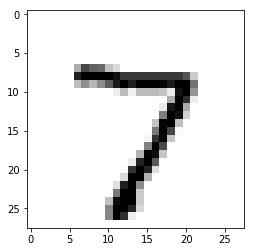

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# flip the bytes from black/white with tilda(~).
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

# use the imshow method and map the image to gray scale
plt.imshow(image, cmap='gray')

## Read labels

In [4]:
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

magic = int.from_bytes(labels[0:4], byteorder="big")
print("Magic number is: ", magic)

# Read in number of labels
num_labels = int.from_bytes(labels[4:8], byteorder="big")
print("Number of labels: ", num_labels)

# Finally read in the first label and output to console
first_label = int.from_bytes(labels[8:9], byteorder="big")
print("First label: ", first_label)

Magic number is:  2049
Number of labels:  10000
First label:  7


### Read entire dataset into memory

In [5]:
import gzip

# Read in entire training set with gzip
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# Read in training labels
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = f.read()

# Read in training images
# Convert images from black background and white foreground to white background and white foreground with tilda(~)
# Reshape the array to 28 * 28 with numpy convert to unsigned 8 bit integer
train_img = ~np.array(list(train_img[16:])).reshape(60000,28,28).astype(np.uint8)

# Read in training labels
# Convert to unsigned 8 bit integer
train_labels = np.array(list(train_labels[8:])).astype(np.uint8)

## Build a simple model

In [6]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

# Use keras Sequential model
model = kr.models.Sequential()

# hidden layer with 1000 neurons and 784 input neurons
# 784 pixels per image in MNIST
model.add(kr.layers.Dense(units=1000, activation="relu", input_dim=784))

# 10 output layers for numbers 0-9 
model.add(kr.layers.Dense(units=10, activation="softmax"))

# Use categorical crossentropy as loss function
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Using TensorFlow backend.


In [7]:
inputs = train_img.reshape(60000, 784)

### One Hot encoding
One Hot encoding is a pre proccessing process for data that is used for ML algorithms. It is mainly used for categorical data such as the MNIST dataset. One hot encoding is used because a majority of ML algorithms as they cannot use label data and they can only read data in a numeric format.

In this example we will use One Hot encoding on the output data (the labels).

The format of the output will look something like this if the label value is 5:

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 

The digit 1 represents the label 5, all other positions in the array are set to 0. This is to indicate that they are not the label value. The label is the position where the 1 is located in the array.

In [8]:
# Encode the classes as above.
encoder = pre.LabelBinarizer()
encoder.fit(train_labels)
# One hot encode output labels
outputs = encoder.transform(train_labels)
# first digit is 5, represented by the 6th position in array with value 1
print(train_labels[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [9]:
for i in range(10):
    print(i, encoder.transform([i]))

0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]


In [10]:
# Fit the model with inputs and outputs set number of epochs to 1 and batch size to 100
model.fit(inputs, outputs, epochs=1, batch_size=200)

Epoch 1/1
60000/60000 [==============================] - 5s 84us/step - loss: 14.5262 - acc: 0.0988


## Test model

In [11]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [12]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

980

In [13]:
model.predict_classes(test_img[11:12])

array([0])

## Model evaluation
As we can see from above the model has an accuracy of 10%. This is the same accuarcy that a person would have if they were to try and guess a digit from the dataset. 

For the next part of this project I am going to build a covolutional nerual network to try and achieve a much higher accuarcy.

## References
- [MNIST](http://yann.lecun.com/exdb/mnist/)
- [MNIST classification](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)